# Lab 01: Data preprocessing

Họ tên: Nguyễn Khải Phú

MSSV: 20127062

## Import

In [1]:

import math
import csv


## Thu thập dữ liệu

## Phần 1: Tiền xử lý dữ liệu (7.5đ)

**Lưu ý:**

Sinh viên không được sử dụng các hàm có sẵn của pandas hay numpy mà cần phải tự cài đặt lại

Mô tả dữ liệu theo thứ tự cột:
```
id :                 int
Hoa :                float 
Li :                 float 
Ma_mon_ngoai_ngu :   str
Ngoai_ngu :          float 
Sinh :               float 
Toan :               float 
Van :                float
``` 

Tuy nhiên, đọc file bằng thư viện csv sẽ chuyển tất cả các giá trị về kiểu `str`, ta sẽ sẽ ép kiểu các giá trị số (trừ các giá trị rỗng) về theo kiểu dữ liệu phù hợp 

Đọc file dữ liệu

In [2]:
def data_reader(path):
    csv_reader = csv.reader(open(path, 'r'), delimiter=',')

    # Skip header
    data = []
    header = csv_reader
    for i,row in enumerate(csv_reader):
        if i == 0:
            header = row
            continue
        convert_list = []
        for i, element in enumerate(row):
            if element == '':
                convert_list.append(str(element))
                continue
            if i == 0:
                convert_list.append(int(element))
            elif i == 3:
                convert_list.append(str(element))
            else:
                convert_list.append(float(element))
        data.append(convert_list)
    return header, data

In [3]:
header, data = data_reader('diemthi2019.csv')

In [4]:
print("header: ", header)
print("So dong: ", len(data))

header:  ['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van']
So dong:  296980


In [5]:
data[23:33]

[[23, 6.75, 5.25, 'N1', 3.6, 3.25, 7.0, 6.17],
 [24, 7.75, 7.0, 'N1', 5.4, 4.0, 7.8, 5.0],
 [25, 3.75, 3.5, '', '', '', 6.8, ''],
 [26, 4.5, 5.75, 'N1', 8.0, 4.75, 8.2, 6.0],
 [27, 3.5, 6.75, 'N1', 6.2, 3.0, 7.6, 7.25],
 [28, 3.0, 5.5, 'N1', 4.8, 3.75, 6.2, 4.75],
 [29, 3.75, 7.5, 'N1', 6.4, 2.5, 7.2, 6.75],
 [30, 3.75, 6.0, 'N1', 7.6, 4.25, 7.6, 7.25],
 [31, 4.5, 5.75, 'N1', 6.6, 4.75, 7.2, 5.5],
 [32, 7.0, 4.75, 'N1', 5.4, 7.0, 7.2, 8.0]]

### 1) Liệt kê các cột thiếu dữ liệu (0.5đ)
Hàm `checkNaN_col()` sẽ trả về `list` chứa tên cột nếu như cột bị thiếu dữ liệu

In [6]:
def checkNaN_col(data, header):
    """Hàm này sẽ liệt kê các cột có chứa dữ liệu có dạng chuỗi rỗng

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        header <list>: list chứa tên của các cột trong file dữ liệu

    Returns:
        <list>: danh sách chứa tên các cột có chứa giá trị chuỗi rỗng
    """
    headerflag = [0 for i in header] 
    for row in data:
        for i, value in enumerate(row):
            if value == '':
                headerflag[i] = 1
    missingCol = [header[i] for i in range(len(headerflag)) if headerflag[i] == 1]
    return missingCol    

In [7]:
assert len(checkNaN_col(data, header)) == 7

Hàm `checkNaN_row()` sẽ trả về `list` chứa index của các dòng có tồn tại giá trị rỗng

In [8]:
def checkNaN_row(data):
    """Hàm này sẽ đếm số dòng có chứa dữ liệu có dạng chuỗi rỗng

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        
    Returns:
        <list>: danh sách chứa index của các dòng có tồn tại giá trị chuỗi rỗng
    """
    index = []
    for i in range(len(data)):
        for j in range(len(data[0])):
            if data[i][j] == '':
                index.append(i)
                break
    return index

In [9]:
row_have_NaN = checkNaN_row(data)
assert len(row_have_NaN) == 17753

### 2) Điền giá trị thiếu (1.5đ)
Điền giá trị thiếu bằng phương pháp constant (điền giá trị 0), mean, median vào giá trị thiếu cho cột numeric, và mode cho cột categorical. Đối với các thuộc tính numeric, giá trị điền vào sẽ là giá trị `float`, đối với thuộc tính categorical, giá trị điền vào sẽ là giá trị `str`

**Lưu ý:** khi tính mean, median hay mode các bạn cần bỏ qua giá trị bị thiếu. Khi thao tác trên các cột dạng float, kết quả phải được làm tròn ở hai chữ số bằng hàm `round()`

Hàm tính mean/median/mode của các cột tương ứng trong dữ liệu sẽ trả về một danh sách, chứa các giá trị mean/median/mode của các cột, và sẽ được hàm `fill_data()` sử dụng danh sách đó để điền vào giá trị thiếu



In [10]:
def sum_data(data):
    """Hàm này dùng để tính tổng theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>, list chứa các giá trị tổng theo cột
        <list>: list chứa số lượng giá trị khác giá trị chuỗi rỗng
    """
    # Hàm này sẽ được dùng bổ trợ để tính sum và số lượng mẫu không bị thiếu của từng cột thuộc tính (trừ cột id)
    sums = [0 for i in header]
    numbers = [0 for i in header]
    for i in range(len(data)):
        for j in range(len(data[0])):
            if j == 0 or j == 3 or data[i][j] == '':
                continue
            sums[j] += data[i][j]
            numbers[j] += 1
    sums = [sums[i] for i in range(len(sums)) if i != 0 and i != 3]
    numbers = [numbers[i] for i in range(len(numbers)) if i != 0 and i != 3]
    return sums, numbers

In [11]:
def mean(data):
    """Hàm này dùng để tính trung bình theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị trung bình theo từng cột
    """
    sums, numbers = sum_data(data)
    return [round(sums[i]/numbers[i],2) for i in range(len(sums))]

In [12]:
assert mean(data) == [5.34, 5.56, 4.76, 4.67, 6.8, 5.62]

In [13]:
def median(data):
    """Hàm này dùng để tính trung bình theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị trung vị theo từng cột
    """
    sums, numbers = sum_data(data)
    values = [[] for i in range(len(numbers))]
    result = []
    for i in range(len(data)):
        res_i = -1
        for j in range(len(data[0])):
            if j == 0 or j == 3:
                continue
            res_i += 1
            if data[i][j] == '':
                continue
            values[res_i].append(data[i][j])
    for i in range(len(numbers)):
        values[i].sort()
        result.append(round(values[i][int(numbers[i]/2)],2))
    return result      

In [14]:
assert median(data) == [5.5, 5.75, 4.4, 4.5, 7.0, 5.75]

In [15]:
def find_distinct_value(data):
    """Hàm này sẽ có nhiệm vụ tìm và trả về danh sách chứa các giá trị có thể có của cột 'Ma_mon_ngoai_ngu'

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list đã được sắp xếp, chứa các giá trị chuỗi có thể có của cột 'Ma_mon_ngoai_ngu'
    """
    # # Chỉ cần quan tâm đến cột 'Ma_mon_ngoai_ngu' và tìm ra các giá trị có thể có
    MaNN = []
    for i in data:
        if i[3] not in MaNN and i[3] != '':
            MaNN.append(i[3])
    return sorted(MaNN)

Thực hiện đếm số lần xuất hiện của các giá trị đã được tìm và chọn ra giá trị xuất hiện nhiều lần nhất, nếu có nhiều giá trị cùng xuất hiện nhiều lần, thì chọn giá trị nhỏ hơn theo bảng chữ cái

In [16]:
def mode(data):
    """Hàm này sẽ có mục tiêu tìm ra giá trị chuỗi xuất hiện nhiều lần nhất. Để đơn giản, sinh viên chỉ cần quan đến cột 'Ma_mon_ngoai_ngu'

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        str: giá trị chuỗi xuất hiện nhiều lần nhất trong cột 'Ma_mon_ngoai_ngu', nếu có nhiều hơn một kết quả, chọn chuỗi nhỏ hơn theo bảng chữ cái
    """
    MaNN = [[i,0] for i in find_distinct_value(data)]
    for i in data:
        for j in MaNN:
            if i[3] == j[0]:
                j[1] += 1
                break
    maxMaNN = MaNN[0]
    for i in MaNN[1:]:
        if i[1] > maxMaNN[1]:
            maxMaNN = i
    return maxMaNN

Hàm `fill_data` sẽ cho phép tùy chọn điền vào giá trị thiếu của cột dạng numeric bằng giá trị 0 hoặc `mean` hoặc `median`, còn cột có dạng categorical sẽ mặc định được fill bằng mode

In [17]:
def fill_data(data, type_on_numeric = 'mean'):
    """Hàm này có nhiệm vụ điền dữ liệu bị thiếu

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        type_on_numeric (str, optional): phương pháp điền dữ liệu cho cột numeric (const/mean/median)

    Returns:
        <list<list>>: dữ liệu sau khi đã được điền vào các giá trị thiếu, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    if type_on_numeric == 'const':
        newdata = []
        m = mode(data)[0]
        for i in data:
            newrow = []
            for j in range(len(i)):
                if i[j] == '':
                    if j == 3:
                        newrow.append(m)
                    else:
                        newrow.append(0)
                else:
                    newrow.append(i[j])
            newdata.append(newrow)
        return newdata
    elif type_on_numeric == 'mean':
        newdata = []
        m = mode(data)[0]
        m1 = mean(data)
        h = [-1,0,1,-1,2,3,4,5]
        for i in data:
            newrow = []
            for j in range(len(i)):
                if i[j] == '':
                    if j == 3:
                        newrow.append(m)
                    else:
                        newrow.append(m1[h[j]])
                else:
                    newrow.append(i[j])
            newdata.append(newrow)
        return newdata
    elif type_on_numeric == 'median':
        newdata = []
        m = mode(data)[0]
        m1 = median(data)
        h = [-1,0,1,-1,2,3,4,5]
        for i in data:
            newrow = []
            for j in range(len(i)):
                if i[j] == '':
                    if j == 3:
                        newrow.append(m)
                    else:
                        newrow.append(m1[h[j]])
                else:
                    newrow.append(i[j])
            newdata.append(newrow)
        return newdata

In [18]:
data_filled_const = fill_data(data, type_on_numeric = 'const')
data_filled_mean = fill_data(data, type_on_numeric = 'mean')
data_filled_median = fill_data(data, type_on_numeric = 'median')

In [19]:
assert data_filled_const[20] == [20, 3.0, 0, 'N1', 0, 5.0, 4.8, 0]
assert data_filled_const[25] == [25, 3.75, 3.5, 'N1', 0, 0, 6.8, 0]

In [20]:
assert data_filled_mean[20] == [20, 3.0, 5.56, 'N1', 4.76, 5.0, 4.8, 5.62]
assert data_filled_mean[25] == [25, 3.75, 3.5, 'N1', 4.76, 4.67, 6.8, 5.62]

In [21]:
assert data_filled_median[20] == [20, 3.0, 5.75, 'N1', 4.4, 5.0, 4.8, 5.75]
assert data_filled_median[25] == [25, 3.75, 3.5, 'N1', 4.4, 4.5, 6.8, 5.75]

### 3) Xóa các dòng và cột mang số lượng của giá trị thiếu lớn hơn một ngưỡng cho trước (0.5đ)
Hàm `filter_missing_row()` sẽ nhận vào dữ liệu và tỉ lệ ngưỡng `ratio` giữa số lượng dữ liệu thiếu và tổng số lượng thuộc tính. Lấy ví dụ, nếu `ratio=0.5` thì các hàng có số lượng giá trị thiếu lớn hơn 50% sẽ bị loại bỏ khỏi tập dữ liệu

In [22]:
def filter_missing_row(data, ratio = 0.5):
    """Hàm này có nhiệm vụ xóa đi các dòng có tỉ lệ dữ liệu bị thiếu LỚN HƠN HOẶC BẰNG một ngưỡng cho trước

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        ratio (float, optional): Tỉ lệ ngưỡng mà dữ liệu cho phép thiếu

    Returns:
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng thiếu lượng lớn dữ liệu, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    limit = len(data[0])*ratio
    newdata = []
    for row in data:
        missing = 0
        for value in row:
            if value == '':
                missing += 1
                if missing > limit:
                    break
        if missing <= limit:
            newdata.append(row)
        
    return newdata

In [23]:
assert len(filter_missing_row(data, 0.3)) == 285581

Hàm `filter_missing_col()` sẽ nhận vào dữ liệu và tỉ lệ ngưỡng `ratio` giữa số lượng dữ liệu thiếu và tổng số lượng mẫu. Lấy ví dụ, nếu `ratio=0.5` thì các thuộc tính (các cột) có số lượng giá trị thiếu lớn hơn 50% so với số lượng mẫu của tập dữ liệu sẽ bị loại bỏ

In [24]:
def filter_missing_col(data, header, ratio = 0.5):
    """Hàm này có nhiệm vụ xóa đi các cột có tỉ lệ dữ liệu bị thiếu LỚN HƠN HOẶC BẰNG một ngưỡng cho trước

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        ratio (float, optional): Tỉ lệ ngưỡng mà dữ liệu cho phép thiếu

    Returns:
        <list>: header đã được cập nhật thông qua việc loại bỏ đi bớt các cột không đủ điều kiện (nếu có loại bỏ)
        <list<list>>: dữ liệu sau khi đã được xóa bớt các cột thiếu lượng lớn dữ liệu, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    limit = len(data)*ratio
    delete = []
    for col in range(len(data[0])):
        missing = 0
        for row in data:
            if row[col] == '':
                missing += 1
                if missing > limit:
                    delete.append(col)
                    break
        
        
    return [header[i] for i in range(len(header)) if i not in delete], [[row[col] for col in range(len(row)) if col not in delete] for row in data]

In [25]:
new_header, new_data = filter_missing_col(data, header, 0.05)

In [26]:
assert new_header == ['id', 'Hoa', 'Li', 'Sinh', 'Toan', 'Van']
# Không tính cột id
assert len(new_data[0]) - 1 == 5


### 4) Xóa các mẫu bị trùng lặp (0.5đ)
Kiểm tra, xác định các dòng bị trùng dữ liệu và xóa các dòng đó. 

Với mỗi dòng, so sánh với các dòng dữ liệu bên dưới để kiểm tra sự trùng lặp, các dòng sẽ được xem là trùng lặp nếu tất cả các thuộc tính giống nhau.

Gợi ý: với mỗi dòng dữ liệu tổng hợp lại thành một chuỗi `str` nào đó rồi đưa vào `set`, sau đó dùng `set` để kiểm tra xem dữ liệu đã xuất hiện chưa. 

In [27]:
def remove_duplicate(data):
    """Hàm này sẽ thực hiện loại bỏ các dòng bị trùng lặp VỀ MẶT DỮ LIỆU (không xét cột id)

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng trùng lặp, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    s = set()
    newdata = []
    for row in data:
        sstr = ''
        for i in range(1,len(row)):
            sstr += str(row[i]) + '#'
        if sstr not in s:
            s.add(sstr)
            newdata.append(row)
    return newdata

In [28]:
assert len(remove_duplicate(data)) == 292762

### 5) Loại bỏ bớt giá trị cực hạn của các cột numeric (1đ)

Sinh viên sẽ sử dụng luật 2 sigma (95% dữ liệu sẽ thuộc đoạn [$\mu \pm 2*\sigma$]) và 3 sigma (99.7% dữ liệu sẽ thuộc đoạn [$\mu \pm 3*\sigma$]) để loại bỏ các mẫu có giá trị mang giá trị không bình thường.

Hàm `std()` sẽ trả về danh sách chứa các giá trị độ lệch chuẩn của các cột có dạng numeric

Hàm `remove_outlier()` sẽ loại bỏ các nhiều bằng các sử dụng lại kết quả của hàm `std()` và hàm `mean()`

**Lưu ý:** Các số float cần phải được làm tròn về 2 chữ số bằng hàm `round()`

In [29]:
def std(data):
    """Hàm này dùng để tính độ lệch chuẩn theo các cột có dạng numeric

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị độ lệch chuẩn theo từng cột
    """
    sds = []
    means = mean(data)
    mean_index = 0

    for col in range(len(data[0])):
        count = 0
        t = 0
        if col != 0 and col != 3:
            for row in range(len(data)):
                if data[row][col] != '':
                    count += 1
                    t += (data[row][col] - means[mean_index])**2
            if(t != 0):
                sds.append(round(math.sqrt(t/(count-1)),2))
            mean_index += 1
        
    return sds

In [30]:
assert std(data) == [1.59, 1.62, 1.78, 1.25, 1.39, 1.11]

Hàm `remove_outlier()` sẽ nhận vào `data` và số `k`-sigma mà chúng ta muốn chọn ra từ dữ liệu, dòng dữ liệu sẽ được giữ lại nếu:
$$
(\mu_i - k*\sigma_i) \le value_i \le (\mu + k*\sigma_i)
$$

Với $\sigma_i, value_i$ lần lượt là giá trị của cột $i$ và độ lệch chuẩn của cột $i$ 

In [31]:
from tqdm import tqdm

def remove_outlier(data, k):
    """Hàm này sẽ loại bỏ các dòng chứa ít nhất một giá trị không thuộc đoạn cho phép ứng với mean và std của từng cột

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        k <float>: số lượng sigma được dùng để tính khoảng 

    Returns:
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng có chứa giá trị không thuộc đoạn dữ liệu cho phép, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    m, s = mean(data), std(data)
    outlier_limit = [[round(i-k*j,2),round(i+k*j,2)] for i, j in zip(m,s)]
    newdata = []
    
    for row in data:
        index = 0
        remove = False
        for col in row:
            if type(col) == float:
                if (col > outlier_limit[index][1] or col < outlier_limit[index][0]):
                    remove = True
                    break
                else:
                    index += 1
            
        if remove == False:
            newdata.append(row)
    return newdata

Do hàm này có khá nhiều phép so sánh nên mình sẽ chọn ra 1000 mẫu đầu tiên của dữ liệu để kiểm tra hàm

In [32]:
sampled_data = data[0:1000]

assert len(remove_outlier(sampled_data, k = 2)) == 810

AssertionError: 

### 6) Tính điểm tổ hợp môn (1.5đ)

Sinh viên cần tạo thêm các cột mới chứa điểm tổ hợp các môn theo thứ tự lần lượt [`A`, `A1`, `A2`, `B`, `D`]. Cụ thể, sinh viên cần tính điểm tổ hợp khối `A`, khối `A1`, khối `A2`, khối `B` và khối `D` theo cách tính.

Cột `A` = `Toan` + `Li` + `Hoa`

Cột `A1` = `Toan` + `Li` + `Ngoai_ngu`

Cột `A2` = `Toan` + `Hoa` + `Ngoai_ngu` 

Cột `B` = `Toan` + `Hoa` + `Sinh`

Cột `D` = `Toan` + `Van` + `Ngoai_ngu`

**Lưu ý:** khối `A1`, khối `A2` chỉ được tính khi `Ma_mon_ngoai_ngu = N1`, nếu `Ma_mon_ngoai_ngu != N1`, thì cột `A1` và `A2` sẽ có giá trị 0

Xét ví dụ: 

+ Cho header

['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van']

+ Xét mẫu dữ liệu

[0, 4.5, 8.25, 'N1', 8.0, 6.0, 8.6, 6.17]

+ Header sẽ được xây dựng thành

['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van', `'A'`, `'A1'`, `'A2'`, `'B'`, `'D'`]

+ Dữ liệu xây dựng thành

[0, 4.5, 8.25, N1, 8.0, 6.0, 8.6, 6.17, `A`, `A1`, `A2`, `B`, `D`]

+ Và bằng

[0, 4.5, 8.25, N1, 8.0, 6.0, 8.6, 6.17, `21.35`, `24.85`, `21.1`, `19.1`, `22.77`]

Sinh viên sử dụng dữ liệu đã được điền đầy đủ giá trị bằng giá trị 0 (data_filled_const) để tính tổng, vì thí sinh không dự thi đồng nghĩa với điểm bằng 0 khi xét tổ hợp môn. Điểm số sẽ được làm tròn tối đa 2 chữ số thập phân bằng hàm `round()`

In [33]:
def calculate_combination(data, header):
    """Hàm này sẽ có nhiệm vụ xây dựng nên các thuộc tính mới cho dữ liệu, cụ thể là tính điểm tổ hợp các khối liên quan

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        header <list>: list chứa tên của các cột thuộc tính


    Returns:
        <list>: header đã được cập nhật thêm tên của các cột thuộc tính mới
        <list<list>>: dữ liệu sau khi đã được xóa bớt các dòng có chứa giá trị không thuộc đoạn dữ liệu cho phép, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    ns = ['A', 'A1', 'A2', 'B', 'D']
    newheader = []
    newdata = []
    for i in header:
        newheader.append(i)
    for i in ns:
        newheader.append(i)
    for i in data:
        newrow = []
        for j in i:
            newrow.append(j)
        newdata.append(newrow)
    
    
    for row in newdata:
        row.append(round((row[1]+row[2]+row[6]),2))
        if row[3] == 'N1':
            row.append(round((row[2]+row[4]+row[6]),2))
            row.append(round((row[1]+row[4]+row[6]),2))
        else:
            row.append(round((row[1]+row[6]),2))
            row.append(round((row[2]+row[6]),2))
        row.append(round((row[1]+row[5]+row[6]),2))
        row.append(round((row[4]+row[6]+row[7]),2))
    
    return newheader, newdata 

In [34]:
new_header, new_data = calculate_combination(data_filled_const, header)

In [35]:
assert new_header == ['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van', 'A', 'A1', 'A2', 'B', 'D']
assert new_data[0] == [0, 4.5, 8.25, 'N1', 8.0, 6.0, 8.6, 6.17, 21.35, 24.85, 21.1, 19.1, 22.77]

### 7) Chuẩn hóa dữ liệu (1đ)

Sinh viên cần chuẩn hóa các cột dạng numeric theo phương pháp min-max và Z-score

Sử dụng kết quả dữ liệu tìm được ở câu 2 để làm input cho hàm chuẩn hóa 

In [36]:
# Sinh viên uncomment đoạn code này để đọc vào dữ liệu đã được điền thiếu có sẵn nếu không làm được câu 2
# header, data_filled_const = data_reader('data_filled_const.csv')
# assert data_filled_const[20] == [20, 3.0, 0, 'N1', 0, 5.0, 4.8, 0]

In [37]:
def min_max_value(data):
    """Hàm này sẽ có nhiệm vụ tìm các giá trị min và max theo từng cột thuộc tính của dữ liệu đầu vào

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list>: list chứa các giá trị min ứng với từng cột thuộc tính có dạng numeric
        <list>: list chứa các giá trị max ứng với từng cột thuộc tính có dạng numeric
    """
    minlist = [11 for i in range(6)]
    maxlist = [-1 for i in range(6)]
    for row in data:
        index = 0
        for col in range(len(row)):
            if col != 0 and col != 3:
                if row[col] < minlist[index]:
                    minlist[index] = row[col]
                if row[col] > maxlist[index]:
                    maxlist[index] = row[col]
                index += 1
    return minlist, maxlist

In [38]:
def min_max_scaler(data):
    """Hàm này sẽ có nhiệm vụ chuẩn hóa dữ liệu theo phương pháp min-max

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list<list>>: dữ liệu sau khi đã được chuẩn hóa theo phương pháp min-max, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    minlist, maxlist = min_max_value(data_filled_const)
    newdata = []
    for row in data:
        newrow = []
        index = 0
        for col in range(len(row)):
            if col != 0 and col != 3:
                newrow.append(round((row[col]-minlist[index])/(maxlist[index]-minlist[index]),2))
                index += 1
            else:
                newrow.append(row[col])
            
        newdata.append(newrow)
    return newdata

In [39]:
def standard_scaler(data):
    """Hàm này sẽ có nhiệm vụ chuẩn hóa dữ liệu theo phương pháp z-score. Sử dụng lại hàm mean() và std() nếu có thể.

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị

    Returns:
        <list<list>>: dữ liệu sau khi đã được chuẩn hóa theo phương pháp z-score, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    meanlist, stdlist = mean(data), std(data)
    newdata = []
    for row in data:
        newrow = []
        index = 0
        for col in range(len(row)):
            if col != 0 and col != 3:
                newrow.append(round((row[col]-meanlist[index])/stdlist[index],2))
                index += 1
            else:
                newrow.append(row[col])
        newdata.append(newrow)
    return newdata

### 8) Mã hóa one-hot (1đ)

Biến đổi cột `Ma_mon_ngoai_ngu` (cột dạng categorical) theo phương pháp mã hóa one-hot

Xét ví dụ: 

+ Cho header

['id', 'Hoa', 'Li', 'Ma_mon_ngoai_ngu', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van']

+ Xét mẫu dữ liệu

[0, 4.5, 8.25, 'N1', 8.0, 6.0, 8.6, 6.17]

+ Header được xây dựng thành

['id', 'Hoa', 'Li', 'Ngoai_ngu', 'Sinh', 'Toan', 'Van', `'N1'`, `'N2'`, `'N3'`, `'N4'`, `'N5'`, `'N6'`]

+ Và dữ liệu bằng

[0, 4.5, 8.25, 8.0, 6.0, 8.6, 6.17, `1`, `0`, `0`, `0`, `0`, `0`]

**Lưu ý:** Sinh viên cần tự cài đặt hàm tìm các giá trị có thể có của một cột dạng categorical và lưu các giá trị của cột đó bằng một danh sách đã được sắp xếp tăng dần theo bảng chữ cái (nếu không thực hiện được câu 2)

Sử dụng kết quả dữ liệu tìm được ở câu 2 để làm input

In [42]:
# Sinh viên uncomment đoạn code này để đọc vào dữ liệu đã được điền thiếu có sẵn nếu không làm được câu 2
# header, data_filled_const = data_reader('data_filled_const.csv')
# assert data_filled_const[20] == [20, 3.0, 0, 'N1', 0, 5.0, 4.8, 0]

In [43]:
def OneHotEncoder(data, header):
    """Hàm này sẽ có nhiệm mã hóa one-hot dữ liệu trên cột 'Ma_mon_ngoai_ngu'

    Args:
        data <list<list>>: list của các dòng dữ liệu trong file dữ liệu đầu vào, mỗi dòng sẽ là một list các giá trị
        header <list>: list chứa tên của các cột thuộc tính


    Returns:
        <list>: header đã được cập nhật thêm tên của các cột thuộc tính mới và đã loại bỏ đi cột 'Ma_mon_ngoai_ngu'
        <list<list>>: dữ liệu sau khi đã được mã hóa one-hot, dữ liệu là list của các dòng, mỗi dòng là một list chứa các giá trị
    """
    # YOUR CODE HERE
    newheader = []
    newdata = []
    for i in header:
        newheader.append(i)
    newheader.pop(3)
    MaNN = {}
    MaNNindex = 0
    for i in find_distinct_value(data):
        MaNN[i] = MaNNindex
        MaNNindex += 1
        newheader.append(i)
    for i in data:
        newrow = []
        keyMaNN = ''
        for j in range(len(i)):
            if j != 3:
                newrow.append(i[j])
            if j == 3:
                keyMaNN = i[j]
        for k in range(len(MaNN)):
            if k == MaNN[keyMaNN]:
                newrow.append(1)
            else:
                newrow.append(0)
        newdata.append(newrow)
    return newheader, newdata    

In [44]:
new_header, new_data = OneHotEncoder(data_filled_const, header)

In [45]:
assert new_data[0] == [0, 4.5, 8.25, 8.0, 6.0, 8.6, 6.17, 1, 0, 0, 0, 0, 0]

## Phần 2: Làm quen với numpy và pandas (2.5đ)

Đa số các yêu cầu trên đề được hỗ trợ bởi pandas và numpy. 

Sang đến phần này yêu cầu sinh viên tính độ tương quan giữa các cặp thuộc tính dạng numeric. 

Phần này cho phép sinh viên sử làm quen và sử dụng pandas để tính toán, và trực quan, tuy nhiên phần nào mình yêu cầu cài đặt thì sinh viên không được sử dụng thư viện có sẵn.

Phần này sinh viên có thể tạo thêm cell nếu cần thiết

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [47]:
df = pd.read_csv('data_filled_const.csv', index_col = 'id')
df

,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Toan,Van
id,,,,,,,
0,4.50,8.25,N1,8.0,6.00,8.6,6.17
1,5.75,7.50,N1,4.4,3.00,7.2,6.75
2,3.50,5.50,N1,2.2,3.75,5.6,4.50
3,5.00,7.00,N1,3.6,4.75,7.0,6.25
4,6.75,8.00,N1,8.8,6.25,7.8,7.25
...,...,...,...,...,...,...,...
296975,5.50,5.50,N1,2.8,3.75,6.6,4.00
296976,4.50,5.25,N1,3.8,5.75,6.2,4.50
296977,3.25,4.25,N1,3.2,5.50,5.4,5.75


### 9) Tính độ tương quan giữa các cột thuộc tính (1đ)

Sinh viên thực hiện tính độ tương quan (correlation) giữa các cặp thuộc tính có dạng numeric, và trực quan hóa theo biểu đồ heat map

Tham khảo:

[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

[https://seaborn.pydata.org/generated/seaborn.heatmap.html](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Sau đó sử dụng thông tin về độ tương quan để kiểm tra giả thuyết :

    Thí sinh học toán tốt sẽ có xu hướng học lý hoặc học hóa tốt

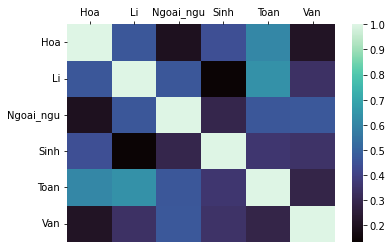

In [48]:
corr = df.corr(method='pearson')
disp = sb.heatmap(corr, cmap="mako")
disp.xaxis.tick_top()

Từ biểu đồ nhiệt, có thể thấy màu của ô Toán-Hoá và Toán-Lí khác màu của vùng lân cận, và gần 1.0 hơn. Vậy có thể suy ra giả thuyết đúng

### 10) Trực quan hóa (1.5đ)

Thực hiện chọn và trực quan hóa phân phối điểm của các môn có trong dữ liệu học và nêu nhận xét về phân bố điểm thi. 

Riêng đối với môn ngoại ngữ, sinh viên chọn riêng ra theo từng `Ma_mon_ngoai_ngu` và trực quan hóa theo từng mã môn ngoại ngữ riêng (N1, N2, ... N6) và nêu nhận xét.



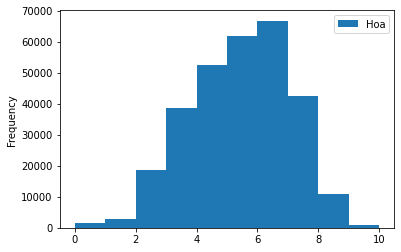

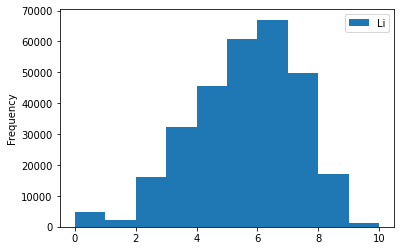

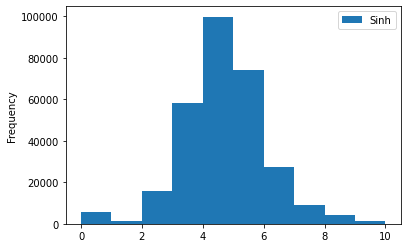

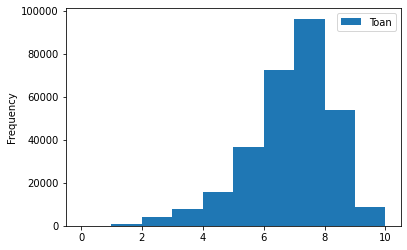

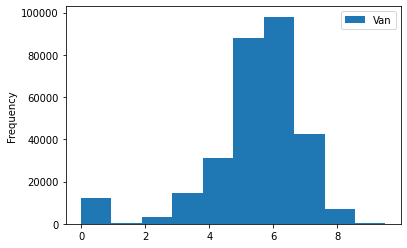

In [49]:
for i in header:
    if i != 'id' and i != 'Ma_mon_ngoai_ngu' and i != 'Ngoai_ngu':
        df.plot(y=i, kind='hist')
plt.show()

Toán là môn có phổ điểm cao nhất khi đỉnh rơi vào điểm 8 với gần 100000 thí sinh đạt mức này. Đây cũng là môn có nhiều điểm 10 nhất. Phổ điểm môn Hoá và Lý khá tương đồng nhau, với đỉnh nằm ở khoảng 6.5-7 điểm. Xung quanh mức này, ở khoảng 5-8 điểm, mỗi mức đều có trên 40000 thí sinh. Phổ điểm môn Văn có đỉnh nằm ở khoảng 5.5-6.5 điểm, mỗi mức ghi nhận khoảng 90000 thí sinh đạt được. Phổ điểm thấp nhất thuộc về môn Sinh, với đỉnh rơi vào mức 4-5 điểm, và đa số thí sinh không thể đạt điểm 7.

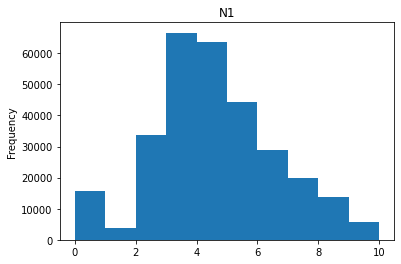

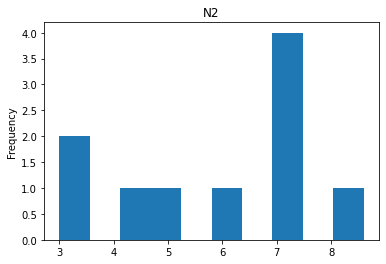

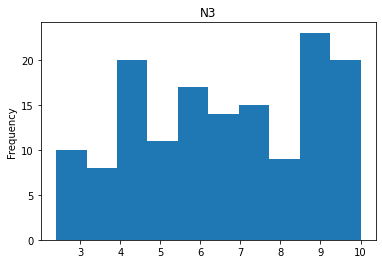

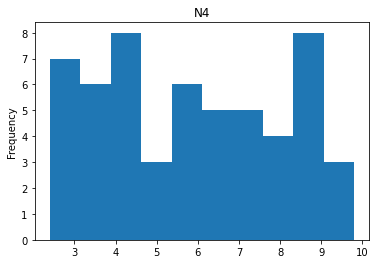

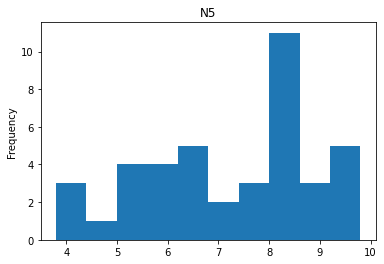

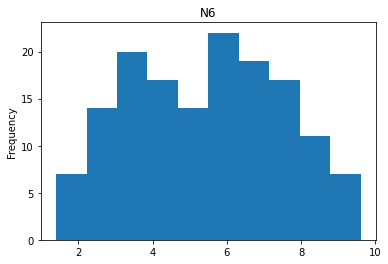

In [50]:
for i in find_distinct_value(data):
    df.loc[df['Ma_mon_ngoai_ngu']==i].plot(y='Ngoai_ngu',kind='hist',legend=False,title=i)
plt.show()

Đại đa số thí sinh đều đăng ký mã ngoại ngữ N1. Phổ điểm này có đỉnh nằm ở khoảng 3-5 điểm, với trên 60000 thí sinh cho mỗi mức. Phổ điểm của các mã N2, N3, N4 và N6 tương đối phân tán do không có nhiều thí sinh đăng ký. Phổ điểm N5 có đỉnh nằm ở khoảng 8-8.5 điểm

# Tài liệu tham khảo cho sinh viên
1. Slide lý thuyết
2. Textbook: J. Han and M. Kamber: Data Mining, Concepts and Techniques, Second Edition - Chapter 2: Getting to Know Your Data & Chapter 3: Data Preprocessing

Mọi thắc mắc các bạn gửi mail cho người hướng dẫn thực hành phụ trách: **Kiều Vũ Minh Đức** (kvmduc3@gmail.com).